<font size="5">Concrete Strength Modeling</font>

<font size="5">Author: Suresh Venkatesan</font>

<font size="5">Objective: Estimate concrete compressive strength using ML techniques based on information about age and ingredients.</font>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-necessary-libraries" data-toc-modified-id="Import-necessary-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import necessary libraries</a></span></li><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Helper Functions</a></span><ul class="toc-item"><li><span><a href="#Five-Point-Summary,-Outliers,-Skew" data-toc-modified-id="Five-Point-Summary,-Outliers,-Skew-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Five-Point Summary, Outliers, Skew</a></span></li><li><span><a href="#Init-regressor-dictionary-function" data-toc-modified-id="Init-regressor-dictionary-function-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Init regressor dictionary function</a></span></li><li><span><a href="#Grid-/-Random-Search-CV-and-Model-Fit" data-toc-modified-id="Grid-/-Random-Search-CV-and-Model-Fit-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Grid / Random Search CV and Model Fit</a></span></li><li><span><a href="#CV-Results-summary" data-toc-modified-id="CV-Results-summary-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CV Results summary</a></span></li><li><span><a href="#Evaluate-Models" data-toc-modified-id="Evaluate-Models-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Evaluate Models</a></span></li></ul></li><li><span><a href="#Load-Dataset" data-toc-modified-id="Load-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load Dataset</a></span><ul class="toc-item"><li><span><a href="#Read-the-data-as-a-data-frame" data-toc-modified-id="Read-the-data-as-a-data-frame-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Read the data as a data frame</a></span></li><li><span><a href="#Data-Types-of-each-attribute" data-toc-modified-id="Data-Types-of-each-attribute-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Types of each attribute</a></span></li><li><span><a href="#Shape-of-the-data" data-toc-modified-id="Shape-of-the-data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Shape of the data</a></span></li><li><span><a href="#Checking-the-presence-of-missing-values" data-toc-modified-id="Checking-the-presence-of-missing-values-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Checking the presence of missing values</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#EDA-on-Dataset---1" data-toc-modified-id="EDA-on-Dataset---1-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>EDA on Dataset - 1</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics-summary-of-all-columns" data-toc-modified-id="Descriptive-statistics-summary-of-all-columns-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Descriptive statistics summary of all columns</a></span></li><li><span><a href="#Five-Point-Summary,-outliers-and-skew-of-numerical-attributes" data-toc-modified-id="Five-Point-Summary,-outliers-and-skew-of-numerical-attributes-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Five-Point Summary, outliers and skew of numerical attributes</a></span></li></ul></li><li><span><a href="#Zero-Value-and-Outlier-Analysis" data-toc-modified-id="Zero-Value-and-Outlier-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Zero Value and Outlier Analysis</a></span><ul class="toc-item"><li><span><a href="#Zero-Value-Analysis" data-toc-modified-id="Zero-Value-Analysis-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Zero Value Analysis</a></span></li><li><span><a href="#Outlier-Analysis" data-toc-modified-id="Outlier-Analysis-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Outlier Analysis</a></span></li></ul></li><li><span><a href="#EDA-on-Dataset---2" data-toc-modified-id="EDA-on-Dataset---2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>EDA on Dataset - 2</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics-summary-of-all-columns" data-toc-modified-id="Descriptive-statistics-summary-of-all-columns-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Descriptive statistics summary of all columns</a></span></li><li><span><a href="#Five-Point-Summary,-outliers-and-skew-of-numerical-attributes" data-toc-modified-id="Five-Point-Summary,-outliers-and-skew-of-numerical-attributes-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Five-Point Summary, outliers and skew of numerical attributes</a></span></li><li><span><a href="#Distribution-and-box-plots-of-Numeric-predictors" data-toc-modified-id="Distribution-and-box-plots-of-Numeric-predictors-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Distribution and box plots of Numeric predictors</a></span></li><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Correlation Matrix</a></span></li><li><span><a href="#Pairplots" data-toc-modified-id="Pairplots-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Pairplots</a></span></li></ul></li><li><span><a href="#Cluster-analysis" data-toc-modified-id="Cluster-analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Cluster analysis</a></span></li><li><span><a href="#Generate-Train-/-Test-sets" data-toc-modified-id="Generate-Train-/-Test-sets-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Generate Train / Test sets</a></span></li><li><span><a href="#Initial-Model-Evaluation" data-toc-modified-id="Initial-Model-Evaluation-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Initial Model Evaluation</a></span></li><li><span><a href="#Models---Fit-and-Evaluate" data-toc-modified-id="Models---Fit-and-Evaluate-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Models - Fit and Evaluate</a></span><ul class="toc-item"><li><span><a href="#Initialize-fitted-regressors" data-toc-modified-id="Initialize-fitted-regressors-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Initialize fitted regressors</a></span></li><li><span><a href="#Initialize-grid-/-random-search-parameters" data-toc-modified-id="Initialize-grid-/-random-search-parameters-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Initialize grid / random search parameters</a></span></li><li><span><a href="#Run-grid-/-random-search-CV" data-toc-modified-id="Run-grid-/-random-search-CV-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Run grid / random search CV</a></span></li><li><span><a href="#Evaluate-Models" data-toc-modified-id="Evaluate-Models-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Evaluate Models</a></span></li><li><span><a href="#Summary-of-all-Models" data-toc-modified-id="Summary-of-all-Models-11.5"><span class="toc-item-num">11.5&nbsp;&nbsp;</span>Summary of all Models</a></span></li><li><span><a href="#Feature-Importances" data-toc-modified-id="Feature-Importances-11.6"><span class="toc-item-num">11.6&nbsp;&nbsp;</span>Feature Importances</a></span></li></ul></li></ul></div>

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import time
sns.set(color_codes = True)
%matplotlib inline 

from scipy import stats
from scipy.stats import zscore

# Preprocessing libraries
from sklearn.preprocessing import MinMaxScaler # MinMax Scaler
from sklearn.preprocessing import StandardScaler # Standard Scaler
from sklearn.preprocessing import RobustScaler # Robust Scaler
from sklearn.preprocessing import PolynomialFeatures # Add polynomial features

# Model libraries
from sklearn.linear_model import LinearRegression # Linear Regression model
from sklearn.linear_model import Ridge # Ridge Regression model
from sklearn.linear_model import Lasso # Lasso Regression model
from sklearn.linear_model import ElasticNet # Lasso Regression model
from sklearn.svm import SVR # Support vector regression model
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression model
from sklearn.ensemble import RandomForestRegressor # Random Forest Regression model
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting Regression model

# Model selection libraries
from sklearn.model_selection import train_test_split # Split data into training and test sets
from sklearn.model_selection import cross_validate # Perform cross-validation
from sklearn.model_selection import GridSearchCV # Exhaustive grid search on hyper parameters.
from sklearn.model_selection import RandomizedSearchCV # Randomized search on hyper parameters.

# Clustering Libraries
from sklearn.cluster import KMeans # K-Means Clustering

# Pipelines
from sklearn.pipeline import Pipeline # Build pipelines
from sklearn.pipeline import make_pipeline # Construct a Pipeline from the given estimators.

In [2]:
# Set some plotting and printing ptions
mpl.rc('axes', labelsize = 30)
mpl.rc('axes', titlesize = 30)
mpl.rc('xtick', labelsize = 20)
mpl.rc('ytick', labelsize = 20)
mpl.rc('legend', fontsize = 20)
mpl.rc('figure', titlesize = 40)

pd.set_option('precision', 4) # Print 4 decimal places for all output parameters

# Helper Functions

* In this section, we will define multiple helper functions which will be used later in the code for fitting models, evaluating and plotting various metrics.

## Five-Point Summary, Outliers, Skew

* This function will print a summary of the five-point summary, number of outliers and skew of all numeric columns.

In [3]:
def fps_out_skew(df_orig, numer_cols):
    
    """
    Function to print summary of the five-point summary, number of outliers 
    and skew of all numeric columns.
    
    Arguments:
        df_orig - Input Dataframe.
        numer_cols - List of all numeric columns.
   
    Returns:
        fps_out_skew_df - Dataframe with summary of the five-point summary, number of outliers 
                          and skew of all numeric columns.
    
    """     
    
    
    fps_out_skew_df = df_orig[numer_cols].quantile(q = [0, 0.25, 0.5, 0.75, 1], axis = 0).transpose()
    quart_cols = {0.00: "Min", 0.25: 'Q1', 0.5: "Q2", 0.75: "Q3", 1.00: "Max"}
    fps_out_skew_df.rename(columns = quart_cols, inplace = True)
    fps_out_skew_df['IQR'] = fps_out_skew_df['Q3'] - fps_out_skew_df['Q1']
    fps_out_skew_df['skew'] = stats.skew(df_orig[numer_cols])
    fps_out_skew_df['out_low'] = 0
    fps_out_skew_df['out_high'] = 0
    out_min_thresh = fps_out_skew_df['Q1'] - 1.5 * fps_out_skew_df['IQR']
    out_max_thresh = fps_out_skew_df['Q3'] + 1.5 * fps_out_skew_df['IQR']
    for col in numer_cols:
        fps_out_skew_df.loc[col, 'out_low'] = ((df_orig[col] < out_min_thresh[col]).sum())
        fps_out_skew_df.loc[col, 'out_high'] = ((df_orig[col] > out_max_thresh[col]).sum())    
             
    fps_out_skew_df['out_tot'] = fps_out_skew_df['out_low'] + fps_out_skew_df['out_high']
    
    return fps_out_skew_df

## Init regressor dictionary function

* This function is used to define all regressors and collect them together into a dictionary. The following regressors are evaluated here:

    * <b>Linear Regression.</b>
    * <b>Ridge Regression.</b>    
    * <b>Lasso Regression.</b> 
    * <b>Support Vector Regression.</b>
    * <b>Decision Tree Regression.</b>  
    * <b>Random Forest Regression.</b>     
    * <b>Gradient Boosting Regression.</b>         

In [4]:
def reg_define():
   
    """
    Function to define all regressors and collect into a dictionary
    
    Arguments:
        None
    
    Returns:
        regs - Dictionary of regressors.
               Key of regs = S.No of regressor
               Each entry of regs is a list with the regressor object, 
               name of the regressor, type of the regressor, 
               coarse parameter list to do grid search,
               fine parameter list to do grid search.
    
    """ 
    reg_ind = -1 # Initialize index of regressors
    regs = dict() # Initialize dictionary of regressors
    reg = [] # List to store regressor objects
    reg_name = [] # List to store regressor names
    reg_type = [] # List to store regressor types

    # Linear Regression.
    reg_ind += 1
    reg.append(LinearRegression())
    reg_name.append('Linear_Regression')
    reg_type.append('Linear')
    param_grid_coarse = {}
    param_grid_fine = {}
    regs.update({reg_ind: [reg[reg_ind], reg_name[reg_ind], reg_type[reg_ind],\
                             param_grid_coarse, param_grid_fine]}) 
    
    # Ridge Regression.
    reg_ind += 1
    reg.append(Ridge())
    reg_name.append('Ridge_Regression')
    reg_type.append('Linear')
    param_grid_coarse = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 25, 50, 75, 100, 500, 1000]}
    param_grid_fine = {}
    regs.update({reg_ind: [reg[reg_ind], reg_name[reg_ind], reg_type[reg_ind],\
                             param_grid_coarse, param_grid_fine]}) 

    # Lasso Regression.
    reg_ind += 1
    reg.append(Lasso(max_iter = 10000))
    reg_name.append('Lasso_Regression')
    reg_type.append('Linear')
    param_grid_coarse = {'alpha': [0.1, 0.5, 1, 5, 10, 25, 50, 75, 100, 500, 1000]}
    param_grid_fine = {}
    regs.update({reg_ind: [reg[reg_ind], reg_name[reg_ind], reg_type[reg_ind],\
                             param_grid_coarse, param_grid_fine]}) 
    
    # Support Vector Regression.
    reg_ind += 1
    reg.append(SVR())
    reg_name.append('Support_Vector_Regression')
    reg_type.append('SVM')
    param_grid_coarse = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
                        }
    param_grid_fine = {'C': [100, 1000, 10000],
                         'gamma': [0.01, 0.1, 1]
                        }  
    regs.update({reg_ind: [reg[reg_ind], reg_name[reg_ind], reg_type[reg_ind],\
                             param_grid_coarse, param_grid_fine]})    

    # Decision Tree Regression.
    reg_ind += 1
    reg.append(DecisionTreeRegressor())
    reg_name.append('Decision_Tree_Regression')
    reg_type.append('Tree')
    param_grid_coarse = {'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': list(range(2, 20, 2)),
                         'min_samples_split': list(range(2, 10, 1))
                        }
    param_grid_fine = {'criterion': ['mae'],
                         'max_depth': [14],
                         'min_samples_split': [7]
                        }    
    regs.update({reg_ind: [reg[reg_ind], reg_name[reg_ind], reg_type[reg_ind],\
                             param_grid_coarse, param_grid_fine]}) 

    # Random Forest Regression.
    reg_ind += 1
    reg.append(RandomForestRegressor())
    reg_name.append('Random_Forest_Regression')
    reg_type.append('Ensemble')
    param_grid_coarse = {'n_estimators': list(range(20, 210, 20)),
                         'criterion': ['mse', 'mae'],
                         'min_samples_split': list(range(2, 7, 1)),
                         'max_features': list(range(2, 7, 1))                                                                               
                        }
    param_grid_fine = {'n_estimators': [200],
                         'criterion': ['mae'],
                         'min_samples_split': [2],
                         'max_features': [6]                                                                               
                        }
    regs.update({reg_ind: [reg[reg_ind], reg_name[reg_ind], reg_type[reg_ind],\
                             param_grid_coarse, param_grid_fine]}) 

    # Gradient Boosting Regression.
    reg_ind += 1
    reg.append(GradientBoostingRegressor())
    reg_name.append('Gradient_Boosting_Regression')
    reg_type.append('Ensemble')
    param_grid_coarse = {'n_estimators': list(range(20, 310, 20)),
                         'criterion': ['mse', 'mae'],                         
                         'max_depth': list(range(1, 6, 1))                                                                               
                        }
    param_grid_fine = {'n_estimators': [360],
                         'criterion': ['mse'],                         
                         'max_depth': [4]                                                                               
                        }
    regs.update({reg_ind: [reg[reg_ind], reg_name[reg_ind], reg_type[reg_ind],\
                             param_grid_coarse, param_grid_fine]}) 
    
    
    
    return regs

## Grid / Random Search CV and Model Fit

* This function is used to do a Grid Search CV or Random Search CV on all the regressors.

In [5]:
def model_fit(regs, regs_fit, X_train, y_train, pre_proc, cv_type, cf, num_cv, num_iter):
    
    """
    Function to do a grid search CV or random search CV on all regressors
    
    Arguments:
        regss - Dictionary of regressors.
               Key of regs = S.No of regressor
               Each entry of regss is a list with the regressor object, 
               name of the regressor, type of the regressor, 
               coarse parameter list to do grid search,
               fine parameter list to do grid search.
        regs_fit - Input list of fitted GridSearchCV or RandomSearchCV objects.
        X_train - Training set features
        y_train - Training set outputs
        pre_proc - List containing pre-processing steps to apply for each regressor.
                 - Each element of pre_proc is a list which contains the list of pre-processing
                   steps to apply for that particular regressor.
        cv_type - List containing type of search to do for each regressor.
                  0: Don't perform either GridSearchCV or RandomSearchCV. In this case,
                     regs_fit for that particular regressor will not be modified.
                  1: Perform GridSearchCV and return updated regs_fit for that regressor.
                  2: Perform RandomSearchCV and return updated regs_fit for that regressor.
        cf - List with details on whether to perform coarse or fine search for each regressor. 
             0: Perform coarse search using param_grid_coarse
             1: Perform fine search using param_grid_fine
        num_cv - List with number of cross-validation runs to do on each regressor.
        num_iter - List with number of parameter settings to be sampled for each regressor
                   if RandomizedSearchCV is run for that regressor.            
   
    Returns:
        regs_fit - Updated list of fitted GridSearchCV or RandomSearchCV objects.
    
    """ 

    # Iterate through all regressors
    for ind in range(len(regs)):
        if (cv_type[ind] != 0): 
            # Create pipeline of pre-processing steps and regressor
            reg_steps = pre_proc[ind].copy()
            reg_steps.append(('reg', regs[ind][0]))
            pipe = Pipeline(reg_steps)

            # Create updated parameter grid for use in pipeline depending on whether coarse or
            # fine search is required.
            if (cf[ind] == 0):
                upd_param_grid = dict([(('reg' + '__' + keys), values)\
                                       for keys, values in regs[ind][3].items()])
            elif (cf[ind] == 1):
                upd_param_grid = dict([(('reg' + '__' + keys), values)\
                                       for keys, values in regs[ind][4].items()])

        if (cv_type[ind] == 1):
            grids = GridSearchCV(pipe, upd_param_grid, cv = num_cv[ind], return_train_score = True,\
                                 verbose = 0)
            print("Fitting regressor %d...." %ind, end = ', ')
            tic = time.process_time() # Set clock timer
            grids.fit(X_train, y_train)
            toc = time.process_time() # Stop clock timer        
            print("Fitting Completed. Elapsed time = %0.2f seconds" %(toc - tic))        
            regs_fit[ind] = grids
        elif (cv_type[ind] == 2):
            rands = RandomizedSearchCV(pipe, upd_param_grid, n_iter = num_iter[ind],\
                                       cv = num_cv[ind], return_train_score = True)
            print("Fitting regressor %d...." %ind, end = ', ')    
            tic = time.process_time() # Set clock timer        
            rands.fit(X_train, y_train)
            toc = time.process_time() # Stop clock timer        
            print("Fitting Completed. Elapsed time = %0.2f seconds" %(toc - tic))        
            regs_fit[ind] = rands  
    
    return regs_fit

## CV Results summary

* This function will print a summary of the CV search results for a given regressor.

In [6]:
def cv_results_summary(regs_fit, reg_ind, print_res = False):
    
    """
    Function to print summary of grid search CV or random search CV on a given regressor.
    
    Arguments:
        regs_fit - List of fitted GridSearchCV or RandomSearchCV objects.
        reg_ind - Index of regressor for which results need to be printed.
        print_res - Print summary of results if print_res = True
   
    Returns:
        cv_results_df - Summary of results from CV search.
    
    """ 
    
    # Load cv_results for the given regressor into a dataframe
    cv_results_df = pd.DataFrame(regs_fit[reg_ind].cv_results_)
    
    # Select only important columns
    cols = []
    for ind, val in enumerate(list(cv_results_df.columns)):
        if (('param_' in val) or ('mean_t' in val) or ('rank_' in val)):
            cols.append(val)
    cv_results_df = cv_results_df[cols]        
    
    if print_res:
        # Print results summary
        display(cv_results_df)
    
    return cv_results_df

## Evaluate Models

* This function will evaluate the R^2 metric on all the fitted models and print the summary.

In [7]:
def model_eval(regs, regs_fit, reg_eval, X_train, y_train, X_test, y_test, print_res = False):

    """
    Function to evaluate R^2 metric on training and test sets.
    All outputs are collected into a DataFrame and printed to screen.
    
    Arguments:
        regs - Dictionary of regressors.
               Key of regs = S.No of regressor
               Each entry of regss is a list with the regressor object, 
               name of the regressor, type of the regressor, 
               coarse parameter list to do grid search,
               fine parameter list to do grid search.
        regs_fit - List of fitted GridSearchCV or RandomSearchCV objects.
        reg_eval - Indicates whether to evaluate the R^2 metric for that regressor or not
                0 - Don't evaluate that particular regressor
                1 - Evaluate that particular regressor
        X_train - Training set features
        y_train - Training set outputs
        X_test - Test set features
        y_test - Test set output
        print_train_res - If true, print summary of results

    Returns:
        model_summary - Dataframe with results summary
   
    """

    # Initialize regressor names list. Will be used as index for output DataFrame
    reg_names = []

    # Arrays to store output parameters
    r2_score_cv_tr_te = np.zeros((len(regs), 4))

    # Iterate through all regressors in 'regs'
    for ind in range(len(regs)):
        
        # Append regressor name to reg_names array
        reg_names.append(regs[ind][1]) 
        
        if (reg_eval[ind] == 1):
            
            # Evaluate best CV score (mean and std.dev) for this regressor
            # Best mean CV score
            r2_score_cv_tr_te[ind, 0] = regs_fit[ind].best_score_
            # Std. deviation of best mean CV score
            r2_score_cv_tr_te[ind, 1] = \
            regs_fit[ind].cv_results_['std_test_score'][regs_fit[ind].best_index_]
                   
            # Extract best estimator
            reg = regs_fit[ind].best_estimator_

            # Obtain scores for training and test sets
            r2_score_cv_tr_te[ind, 2] = reg.score(X_train, y_train)
            r2_score_cv_tr_te[ind, 3] = reg.score(X_test, y_test)
        
    # Club results of all classifiers into a single dataframe
    ms_cols = ['Mean_CV_Score', 'std_CV_Score', 'Train_Score', 'Test_Score']
    model_summary = pd.DataFrame(r2_score_cv_tr_te, index = reg_names,\
                             columns = ms_cols)
    if print_res:
        # Print R^2 score of CV run, training set and test set
        print("R^2_Score_Summary")
        print("=================")
        display(model_summary)
        print()

    return model_summary

# Load Dataset

## Read the data as a data frame

In [8]:
# Since the file is in .csv format, read_csv() command is used to read the data.
df_orig = pd.read_csv('concrete.csv')
display(df_orig.head())

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


<b>The response (output) variable is 'strength' which indicates the actual concrete compressive strength in MPa for a given mixture.

Other Variables:

    a) Cement: Amount of cement in kg added for 1m^3 of concrete (kg / m^3).
    b) Blast furnace slag and Fly ash, : Supplementary cementitious materials added for the preparation of concrete (kg / m^3). They can be considered as binder together with cement. Both increase strength and durability of concrete. However, the hardening process takes longer and therefore it requires more time to reach full compressive strength.
    c) Superplasticizer: Supplementary cementitious materials added for the preparation of concrete (kg / m^3). Superplasticizer are used to ensure better flow properties because they minimize particle segregation. Further, they allow to decrease the water-cement ratio which leads to higher compressive strength.
    d) Water: Amount of water in kg added for 1m^3 of concrete (kg / m^3).
    e) coarseagg / fineagg: Amount of coarse and fine aggregates in kg added for 1m^3 of concrete (kg / m^3).
    f) Age: Number of days (1 day to 1 year) after which concrete strength is measured. Concrete hardens with time and strength increases. 
    g) Concrete Compressive strength: The compressive strength is the cylindrical compressive strength mesured on a cylindrical sample. (MPa)

## Data Types of each attribute

In [9]:
# Print the data types of all columns
df_orig.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

<b>All features are of numeric type (int64 of float64). No categorical features present.</b>

## Shape of the data

In [10]:
df_orig.shape

(1030, 9)

<font size="3"><b>There are 1030 entries (rows) and 9 (columns). One column 'strength' is the response variable. The remaining 8 columns are the input features.</b></font>

## Checking the presence of missing values

In [11]:
df_orig.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

<b>There are no missing values in any columns.</b>

# Feature Engineering

<b>The strength of concrete depends on the ratio of water to cement. If the ratio of water to cement is high, then the concrete strength will be lower and vice-versa. We will create a new feature called 'wat_cem_rat' (water-to-cement ratio) and drop the 'cement' feature.</b>

In [12]:
df_orig['wat_cem_rat'] = df_orig['water']/df_orig['cement']
df_orig.drop(columns = ['cement'], inplace = True)
df_orig.head()

,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,wat_cem_rat
0,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.4402
1,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.9372
2,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.7496
3,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.8571
4,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.2487


# EDA on Dataset - 1

## Descriptive statistics summary of all columns

In [13]:
# Get some descriptive statistics of all columns
df_orig.describe(include = 'all').transpose()

,count,mean,std,min,25%,50%,75%,max
slag,1030.0,73.8958,86.2793,0.0000,0.0000,22.0000,142.9500,359.4000
ash,1030.0,54.1883,63.9970,0.0000,0.0000,0.0000,118.3000,200.1000
water,1030.0,181.5673,21.3542,121.8000,164.9000,185.0000,192.0000,247.0000
superplastic,1030.0,6.2047,5.9738,0.0000,0.0000,6.4000,10.2000,32.2000
coarseagg,1030.0,972.9189,77.7540,801.0000,932.0000,968.0000,1029.4000,1145.0000
fineagg,1030.0,773.5805,80.1760,594.0000,730.9500,779.5000,824.0000,992.6000
age,1030.0,45.6621,63.1699,1.0000,7.0000,28.0000,56.0000,365.0000
strength,1030.0,35.8180,16.7057,2.3300,23.7100,34.4450,46.1350,82.6000
wat_cem_rat,1030.0,0.7483,0.3140,0.2669,0.5333,0.6753,0.9352,1.8824


<b>We can see from the table above that various features are on different scales with different means, standard deviations and mix / max values. Hence, feature scaling will need to be used before fitting any models. </b>

## Five-Point Summary, outliers and skew of numerical attributes

In [14]:
# Define name of output variable
out_var = 'strength'

# Get list of numeric columns
numer_cols = list(df_orig.select_dtypes(include = np.number).columns)

In [15]:
fps_out_skew(df_orig, numer_cols)

,Min,Q1,Q2,Q3,Max,IQR,skew,out_low,out_high,out_tot
slag,0.0000,0.0000,22.0000,142.9500,359.4000,142.9500,0.7996,0,2,2
ash,0.0000,0.0000,0.0000,118.3000,200.1000,118.3000,0.5366,0,0,0
water,121.8000,164.9000,185.0000,192.0000,247.0000,27.1000,0.0745,5,4,9
superplastic,0.0000,0.0000,6.4000,10.2000,32.2000,10.2000,0.9059,0,10,10
coarseagg,801.0000,932.0000,968.0000,1029.4000,1145.0000,97.4000,-0.0402,0,0,0
fineagg,594.0000,730.9500,779.5000,824.0000,992.6000,93.0500,-0.2526,0,5,5
age,1.0000,7.0000,28.0000,56.0000,365.0000,49.0000,3.2644,0,59,59
strength,2.3300,23.7100,34.4450,46.1350,82.6000,22.4250,0.4164,0,4,4
wat_cem_rat,0.2669,0.5333,0.6753,0.9352,1.8824,0.4018,0.9567,0,18,18


<b> There are multiple features with zero values and outliers. Lets review these first.</b>

# Zero Value and Outlier Analysis

* Three features, 'slag', 'ash' and 'superplastic' have multiple zero values. Also, multiple features have outliers. Lets analyze these in detail and fix them if required.

## Zero Value Analysis

In [16]:
# Print value counts of slag column in ascending order.
df_orig['slag'].value_counts().sort_index().head(5)

0.0     471
11.0      4
13.6      5
15.0      5
17.2      1
Name: slag, dtype: int64

In [17]:
# Print value counts of ash column in ascending order.
df_orig['ash'].value_counts().sort_index().head(5)

0.0     566
24.5     15
59.0      1
60.0      1
71.0      1
Name: ash, dtype: int64

In [18]:
# Print value counts of superplastic column in ascending order.
df_orig['superplastic'].value_counts().sort_index().head(5)

0.0    379
1.7      4
1.9      1
2.0      1
2.2      1
Name: superplastic, dtype: int64

<b>There are 471 entries where the value of slag is 0, 566 entries where the value of ash is 0, 379 entries where the value of superplastic is 0. These could either be unavailable values of these features or actual batches of concrete where these material were not added. Since there are a large number of zero values for these features, we will leave them as they are and not impute them with any other values.</b>

## Outlier Analysis

<b>Based on the IQR method, there are outliers in these features: slag, water, superplastic, fineagg, age, wat_cem_rat. We will ignore the outliers in the 'age' feature since these outliers are realistic values (strength measurements done over a period of 1 year). For the remaining features, we will clamp the outliers to either (Q3 + 1.5 * IQR) if the outliers are on the upper side or (Q1 - 1.5 * IQR) if the outliers are on the lower side.</b>

In [19]:
out_cols = ['slag', 'water', 'superplastic', 'fineagg', 'wat_cem_rat']
for col in out_cols:
    q1 = df_orig[col].quantile(q = 0.25) 
    q2 = df_orig[col].quantile(q = 0.5)
    q3 = df_orig[col].quantile(q = 0.75)
    iqr = q3 - q1
    out_max_thresh = q3 + 1.5 * iqr
    out_min_thresh = q1 - 1.5 * iqr
    out_upp_ind = list(df_orig[col][(df_orig[col] > out_max_thresh)].index)
    out_low_ind = list(df_orig[col][(df_orig[col] < out_min_thresh)].index)
    for ind in (out_upp_ind):
        df_orig[col].iat[ind] = out_max_thresh
    for ind in (out_low_ind):
        df_orig[col].iat[ind] = out_min_thresh       

# EDA on Dataset - 2

## Descriptive statistics summary of all columns

In [20]:
# Get some descriptive statistics of all columns
df_orig.describe(include = 'all').transpose()

,count,mean,std,min,25%,50%,75%,max
slag,1030.0,73.8919,86.2664,0.0000,0.0000,22.0000,142.9500,357.3750
ash,1030.0,54.1883,63.9970,0.0000,0.0000,0.0000,118.3000,200.1000
water,1030.0,181.5433,21.2251,124.2500,164.9000,185.0000,192.0000,232.6500
superplastic,1030.0,6.1590,5.8025,0.0000,0.0000,6.4000,10.2000,25.5000
coarseagg,1030.0,972.9189,77.7540,801.0000,932.0000,968.0000,1029.4000,1145.0000
fineagg,1030.0,773.4396,79.8153,594.0000,730.9500,779.5000,824.0000,963.5750
age,1030.0,45.6621,63.1699,1.0000,7.0000,28.0000,56.0000,365.0000
strength,1030.0,35.8180,16.7057,2.3300,23.7100,34.4450,46.1350,82.6000
wat_cem_rat,1030.0,0.7444,0.3023,0.2669,0.5333,0.6753,0.9352,1.5379


<b>Comparing with the results on the original dataset (before the outlier fix), we can see that the means and standard deviations of all the features have not changed much. </b>

## Five-Point Summary, outliers and skew of numerical attributes

In [21]:
fps_out_skew(df_orig, numer_cols)

,Min,Q1,Q2,Q3,Max,IQR,skew,out_low,out_high,out_tot
slag,0.0000,0.0000,22.0000,142.9500,357.3750,142.9500,0.7986,0,0,0
ash,0.0000,0.0000,0.0000,118.3000,200.1000,118.3000,0.5366,0,0,0
water,124.2500,164.9000,185.0000,192.0000,232.6500,27.1000,0.0551,0,0,0
superplastic,0.0000,0.0000,6.4000,10.2000,25.5000,10.2000,0.6677,0,0,0
coarseagg,801.0000,932.0000,968.0000,1029.4000,1145.0000,97.4000,-0.0402,0,0,0
fineagg,594.0000,730.9500,779.5000,824.0000,963.5750,93.0500,-0.2857,0,0,0
age,1.0000,7.0000,28.0000,56.0000,365.0000,49.0000,3.2644,0,59,59
strength,2.3300,23.7100,34.4450,46.1350,82.6000,22.4250,0.4164,0,4,4
wat_cem_rat,0.2669,0.5333,0.6753,0.9352,1.5379,0.4018,0.7431,0,0,0


* <b>From the table above, we can see that there are outliers in only 'age' feature.</b>
* <b>'slag' and 'wat_cem_rat' have mild right-sided skew.</b>
* <b>'age' has significant right-sided skew probably indicating that only a few strength measurements are available for higher ages, which is also resulting in significant number of outliers on the higher side.</b>

## Distribution and box plots of Numeric predictors

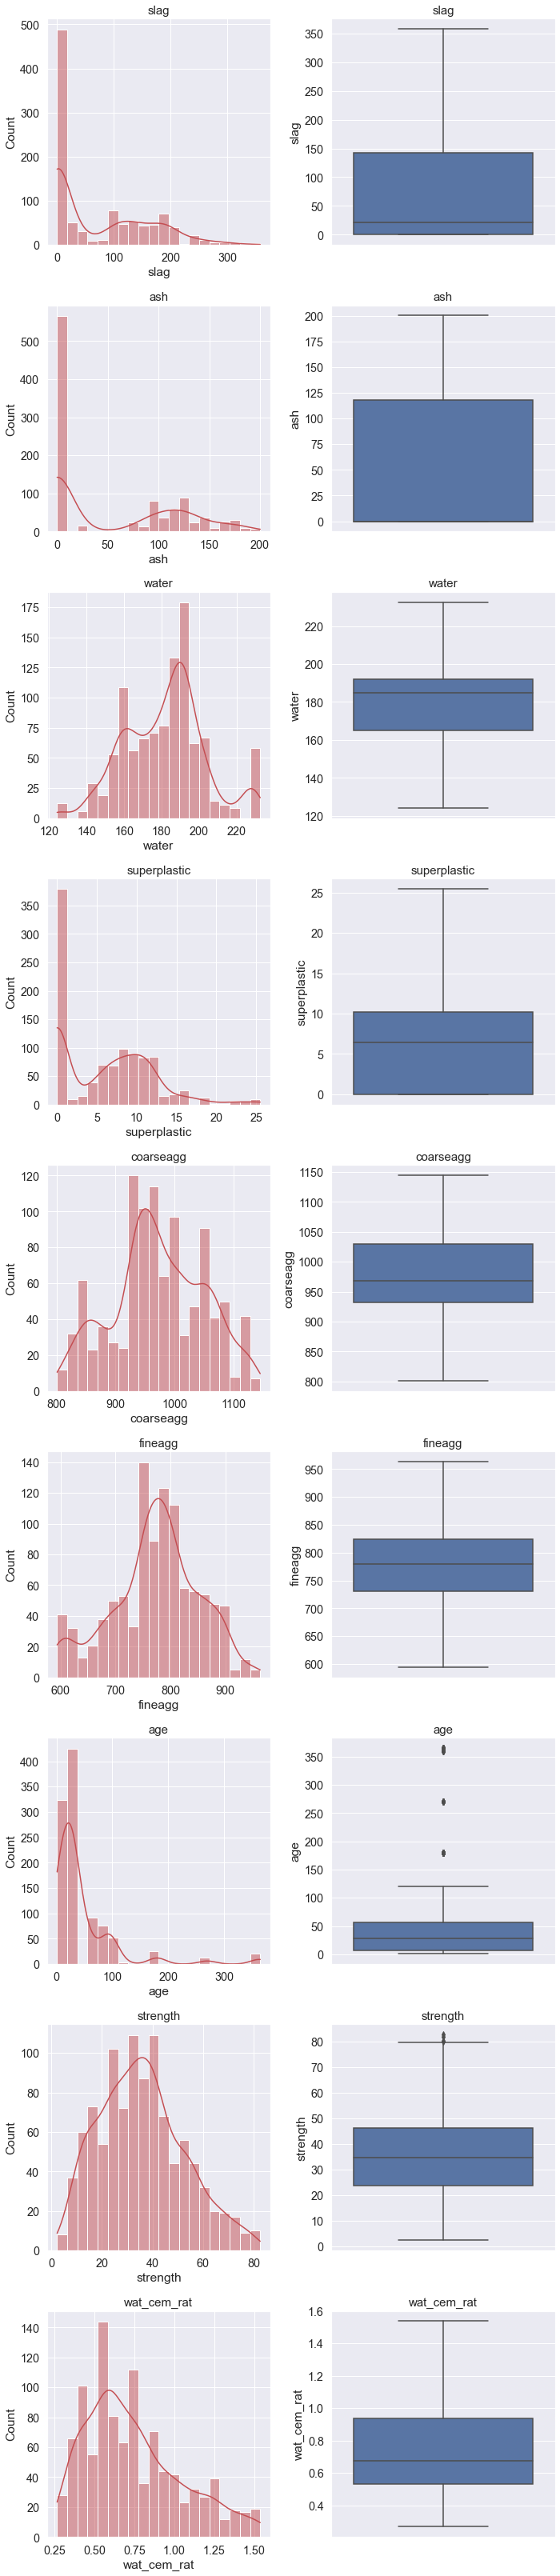

In [22]:
# Initialize figure to plot distributions and box plots of all numeric predictors
num_cols = 2 # Number of columns to plot in the figure
num_rows = len(numer_cols) # Number of rows to plot in the figure
fig = plt.figure(figsize = (10, (5 * num_rows))) 

# Plot distribution and boxplots for all numeric perdictors
for ind, val in enumerate(numer_cols):

    sns.set(font_scale = 1.3)
    ax = plt.subplot(num_rows, num_cols ,((2 * ind) + 1))
    sns.histplot(df_orig[val], bins = 20, kde = True, color = 'r', ax = ax)
    ax.set_title(val, fontsize = 15)
    
    ax = plt.subplot(num_rows, num_cols ,((2 * ind) + 2))    
    sns.boxplot(y = val, data = df_orig, ax = ax)
    ax.set_title(val, fontsize = 15)
    
plt.tight_layout()
plt.show()

* <b>blast furnace slag:</b> Shows a significant right-tailed distribution. As mentioned above, there are significant number of entries for which this value is zero.
* <b>fly ash:</b> Shows a significant right-tailed distribution. As mentioned above, there are significant number of entries for which this value is zero.
* <b>water:</b> Shows a distribution with a mix of gaussians. Distribution is fairly symmetric.
* <b>superplasticizer:</b> Shows a significant right-tailed distribution. As mentioned above, there are significant number of entries for which this value is zero.
* <b>coarseagg:</b> Shows a distribution with a mix of gaussians. Distribution is fairly symmetric.
* <b>fineagg:</b> Shows a fairly symmetric gaussian distribution.
* <b>age:</b> Shows a significant right-tailed distribution with many outliers. Most of the samples have an age less than 56 days. A few samples are in the age group of 90 to 120 days. Remaining are above 100 days.
* <b>strength (output variable):</b> Fairly symmetric distribution with a mix of gaussians. Mild right-tailed distribution and a few outliers seen.
* <b>wat_cem_ratio:</b> Has a slight right-tailed distribution. No outliers seen. This ratio varies from 1/4 to 1.5 with a mode of 0.5.

## Correlation Matrix

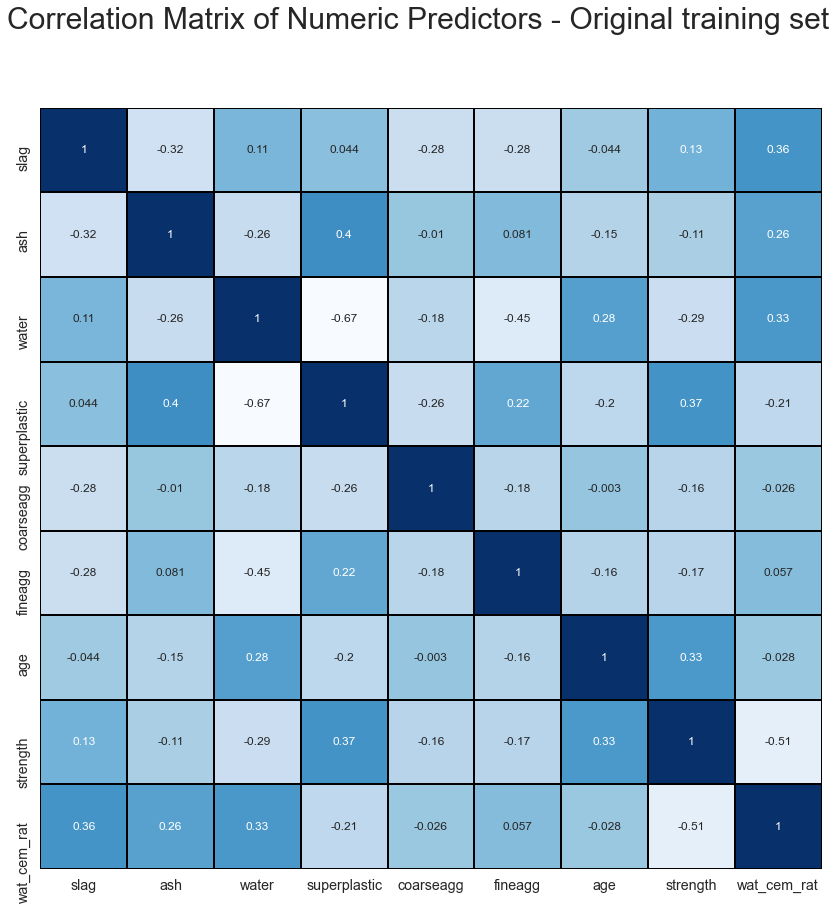

In [23]:
corr_mat = df_orig.corr()
fig = plt.figure(figsize = (14, 14))
fig.suptitle("Correlation Matrix of Numeric Predictors - Original training set", fontsize = 30)
sns.heatmap(corr_mat, annot_kws = {"fontsize": 12}, linewidths = 1,\
            linecolor = 'black', cmap = 'Blues', annot = True ,fmt = '.2g', cbar = False)
plt.show()

<b>No significant correlation seen between any of the features.</b>

## Pairplots

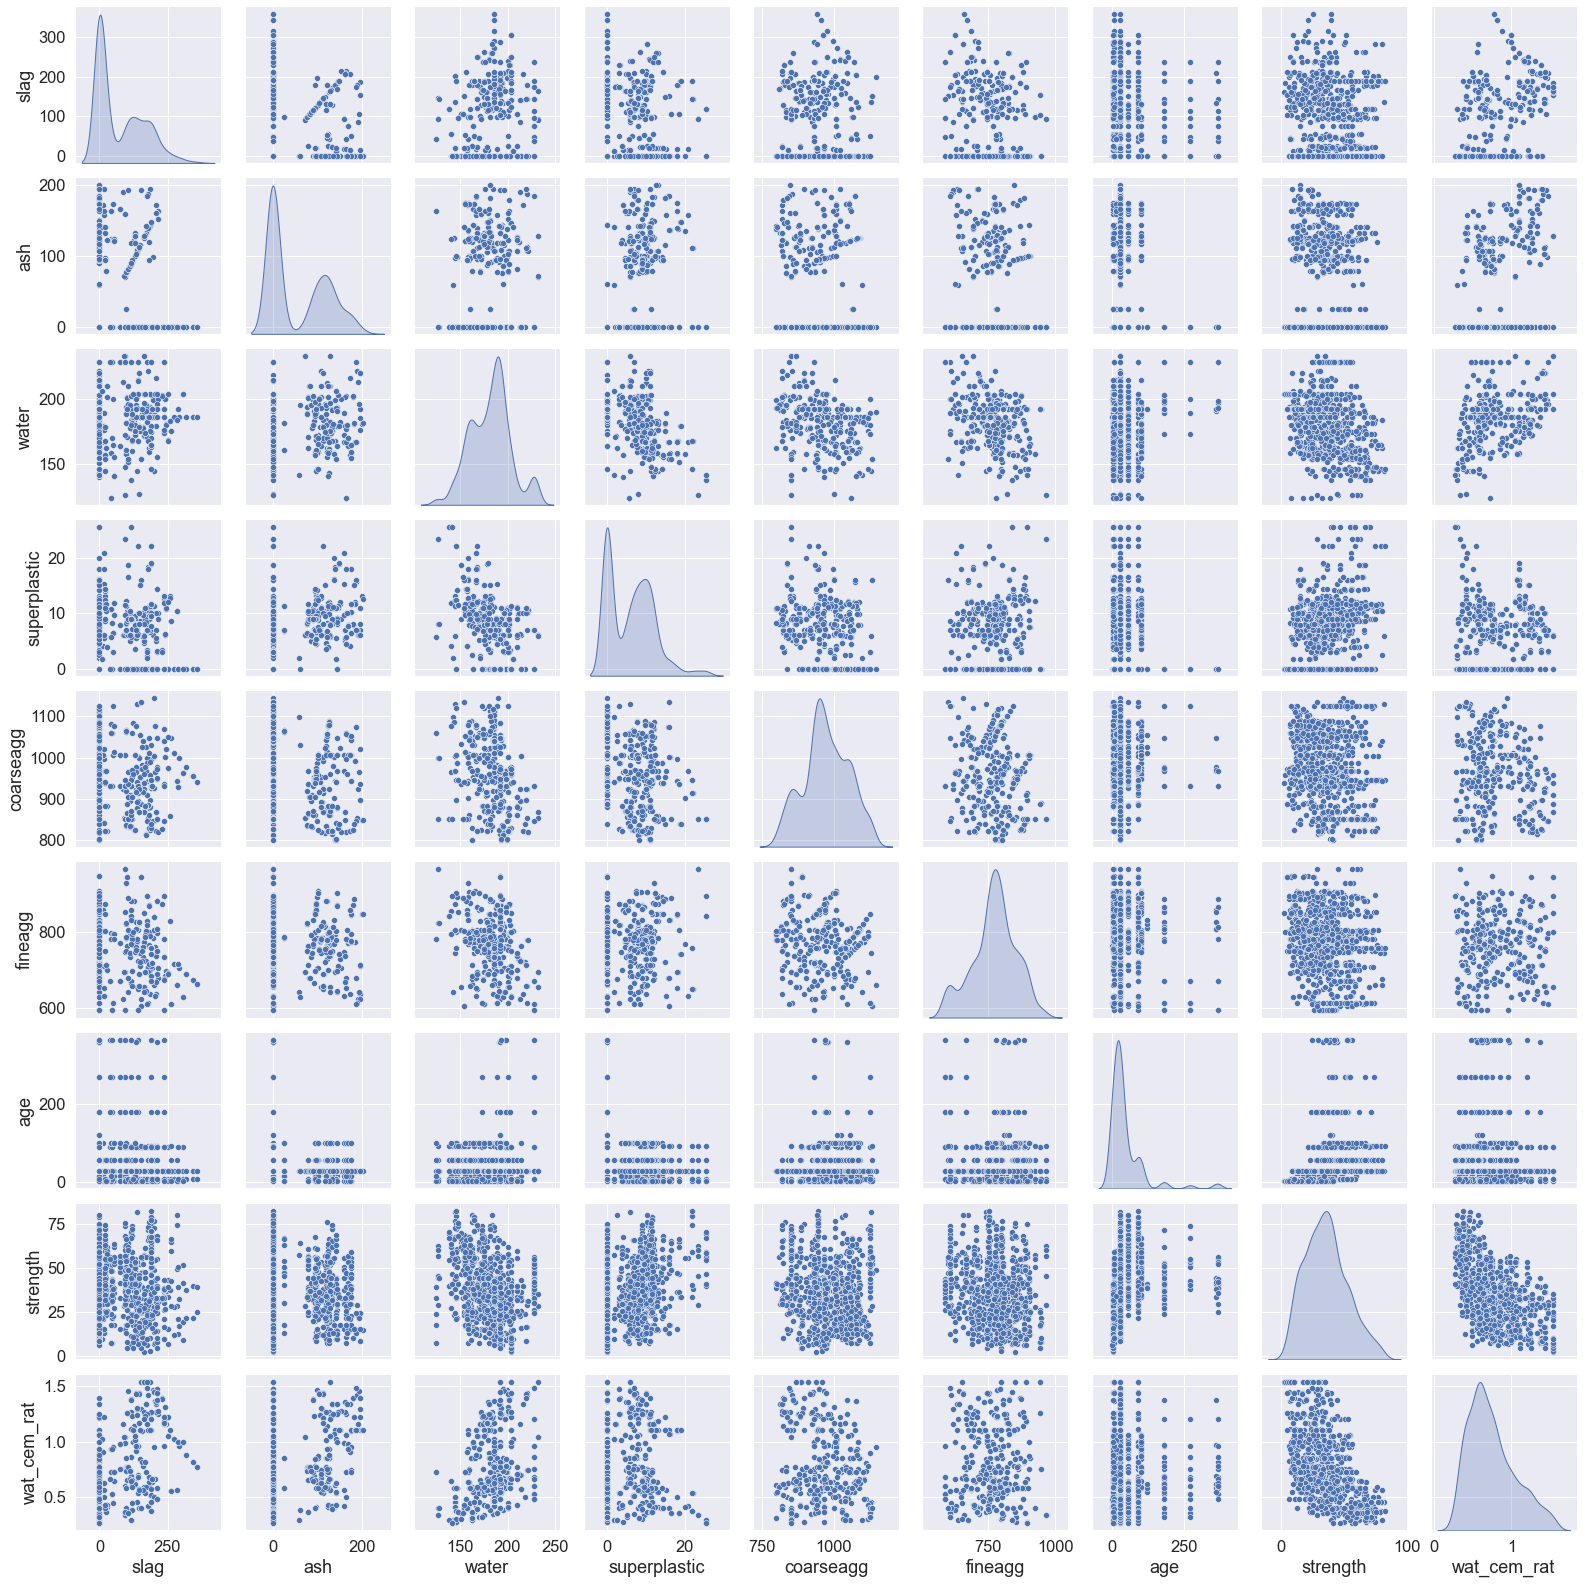

In [24]:
# Pairplots of the data set.
sns.set(font_scale = 1.5)
sns.pairplot(df_orig, diag_kind='kde')
plt.show()

* <b>No significant relationship seen between any of the predictor variables.</b>
* <b>The main relationship that can be seen is between strength and wat_cem_rat (water to cement ratio). As the water to cement ratio increases, the concrete strength decreases in non-linear fashion.</b>

# Cluster analysis

<b>Based on the distribution plots above, we can see that many features seem to have a mix of gaussians. We will do a cluster analysis below and study the results.

First, we will do a KMeans clustering with a range of 1 to 9 clusters and plot the elbow plot.</b>

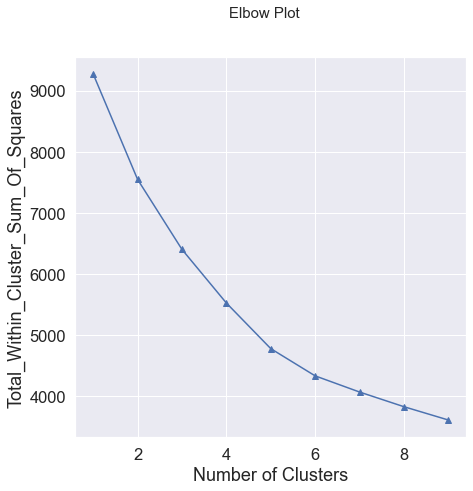

In [25]:
# Scale all columns to have a mean of 0 and a std.dev of 1.
df_orig_sc = df_orig.apply(zscore) 

# Initialize array to store values of "total within cluster sum of squares"
tot_wc_ss = [] 

# Iterate across cluster values from 1 to 9.
for ind in range(1, 10, 1):
    clusters = KMeans(ind)
    clusters.fit(df_orig_sc)
    tot_wc_ss.append(clusters.inertia_)
fig = plt.figure(figsize = (7,7))
fig.suptitle("Elbow Plot", fontsize = 15)
ax = plt.subplot(1, 1, 1)
ax.plot(range(1, 10, 1), tot_wc_ss, 'b^-');
ax.set_xlabel("Number of Clusters")
ax.set_ylabel("Total_Within_Cluster_Sum_Of_Squares")
plt.show()

<b>Based on the plot above, the elbow seems to be around 5 clusters. Lets now re-run Kmeans clustering with 5 clusters and study the resulting clusters.</b>

In [26]:
# Generate clusters with n_clusters = 5.
df_orig_copy = df_orig.copy() # Create a copy of the original dataframe.
clusters = KMeans(5)
clusters.fit(df_orig_sc)
df_orig_copy["cluster_id"] = clusters.labels_
df_orig_copy.head(5)

,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,wat_cem_rat,cluster_id
0,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.4402,3
1,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.9372,1
2,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.7496,1
3,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.8571,3
4,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.2487,3


In [27]:
df_orig_copy.groupby(by = 'cluster_id').agg(['mean']).sort_values(by = ('strength', 'mean'))

,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,wat_cem_rat
,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster_id,,,,,,,,,
3,181.8186,37.2825,194.4395,3.7090,941.5547,749.1372,28.9327,27.8941,1.1039
4,12.1410,2.3190,190.7219,0.5638,1025.3562,770.0186,28.6333,28.2303,0.5957
1,16.0170,127.7855,172.6986,8.6932,994.6207,800.8756,35.6512,31.9003,0.8000
0,58.5954,0.0000,213.4769,0.0000,966.0585,692.5369,243.3846,44.5977,0.6800
2,115.4582,26.9736,162.2481,12.4120,921.9428,785.4936,34.5962,55.3327,0.4426


* <b>As expected, higher water-to-cement ratio leads to lower concrete strength and vice-versa.</b>
* <b>Higher ages are associated with higher concrete strength which also makes sense since concrete strength improves with time.</b>
* <b>All other features show highly non-linear relationships with strength and no clear pattern is visible from the table above.</b>

# Generate Train / Test sets

* The dataset will now be split into train and test sets in the ratio 70:30.

In [28]:
X = df_orig.drop(columns = out_var) # Drop the response variable
y = df_orig[out_var]

# Generate train and test datasets
# Training set : test set ratio = 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("X_train.shape: {}" .format(X_train.shape))
print("y_train.shape: {}" .format(y_train.shape))
print("X_test.shape: {}" .format(X_test.shape))
print("y_test.shape: {}" .format(y_test.shape))

X_train.shape: (721, 8)
y_train.shape: (721,)
X_test.shape: (309, 8)
y_test.shape: (309,)


# Initial Model Evaluation

* In this section, we will evaluate basic linear regression and ridge regression along with polynomial transformation of the input features.
* We will apply polynomial transformations from order 1 to order 6, fit linear regression (with no regulariation) and ridge regression (with L2 regularization). The residuals on the training set (y_train - y_train_pred) will then be plotted for various polynomial orders.

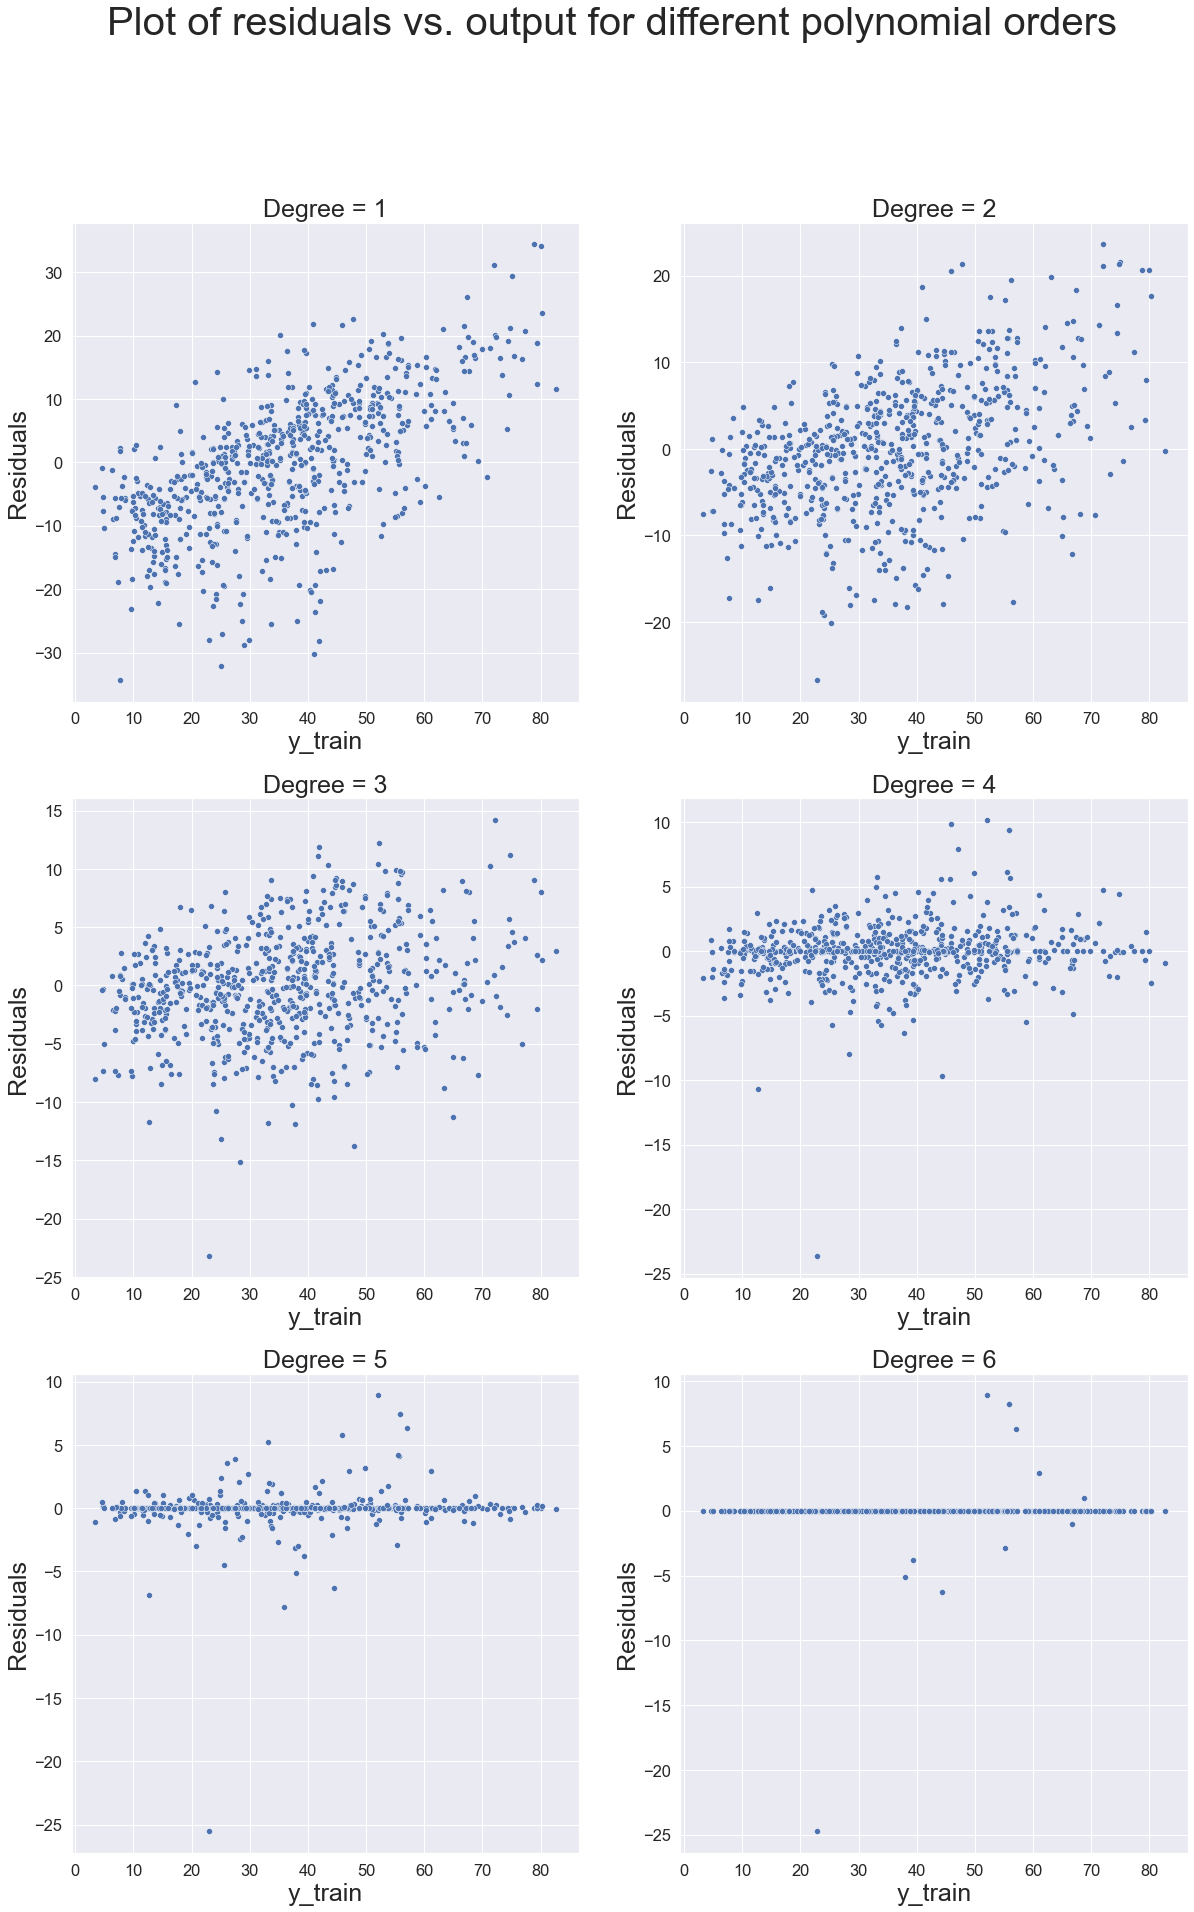

In [31]:
fig = plt.figure(figsize = (20, 30)) 
fig.suptitle('Plot of residuals vs. output for different polynomial orders')

# Initialize array to store mean train and mean cv scores for various polynomial orders for 
# linear regression and ridge regression.
train_cv_score_arr = np.zeros((6, 4)) 

# Transform input using polynomials of order 1 to 6 and then fit linear regression using 
# the training set
# Also, run 5-fold cross-validation using these polynomial transformations with 
# linear and ridge regression and store the results in a dataframe.
for deg in range(1, 7, 1):
    pipe_lr = make_pipeline(PolynomialFeatures(degree = deg, include_bias = False), \
                          StandardScaler(), LinearRegression())
    pipe_lr.fit(X_train, y_train)
    y_train_pred = pipe_lr.predict(X_train)
    ax = plt.subplot(3, 2, deg)
    sns.scatterplot(x = y_train, y = (y_train - y_train_pred), ax = ax)
    ax.set_title('Degree = %d' %deg, fontsize = 25)
    ax.set_ylabel('Residuals', fontsize = 25)
    ax.set_xlabel('y_train', fontsize = 25)
    scores_lr = cross_validate(pipe_lr, X_train, y_train, cv = 5, scoring = 'r2',\
                               return_train_score = True)
    train_cv_score_arr[(deg-1), 0] = scores_lr['train_score'].mean()
    train_cv_score_arr[(deg-1), 1] = scores_lr['test_score'].mean()    

    pipe_rr = make_pipeline(PolynomialFeatures(degree = deg, include_bias = False), \
                      StandardScaler(), Ridge())
    scores_rr = cross_validate(pipe_rr, X_train, y_train, cv = 5, scoring = 'r2',\
                               return_train_score = True)
    train_cv_score_arr[(deg-1), 2] = scores_rr['train_score'].mean()   
    train_cv_score_arr[(deg-1), 3] = scores_rr['test_score'].mean()       
    
plt.show()
train_cv_score_columns = ['Linear_Reg_Train_Score', 'Linear_Reg_CV_Score',\
                    'Ridge_Reg_Train_Score', 'Ridge_Reg_CV_Score']
train_cv_score_df = pd.DataFrame(train_cv_score_arr, columns = train_cv_score_columns,\
                                 index = list(range(1, 7, 1)))

<b>The plots above show the residuals (y_train - y_train_pred) of linear regression on the dataset for polynomial orders from 1 to 6. As can be seen from the plots, the residuals decrease in magnitude as the order of the polynomial is increased, indicating that using polynomial terms in the regression fit might give improved R^2 scores.<b>

In [32]:
# Print results of 5-fold CV runs done above.
display(train_cv_score_df)

,Linear_Reg_Train_Score,Linear_Reg_CV_Score,Ridge_Reg_Train_Score,Ridge_Reg_CV_Score
1,0.6073,5.8457e-01,0.6073,0.5848
2,0.8130,7.7540e-01,0.8004,0.7687
3,0.9324,8.2456e-01,0.8843,0.8438
4,0.9877,-9.3585e+14,0.9155,0.8535
5,0.9952,-4.2796e+11,0.9358,0.8301
6,0.9953,-2.3157e+08,0.9501,0.8004


* <b>From the table above, we can see that the mean training R^2 score increases as the order of the polynomial increases which is expected.</b>
* <b>For polynomial regression, the mean CV score increases to 0.82 for order = 3 and then significantly drops off after that due to overfitting of the training set.</b>
* <b>With L2 regularization included (ridge regression), the mean CV scores are much better as the regularization helps to reduce overfitting.</b>
* <b>Mean CV score with ridge regression peaks for polynomial order = 4. We will use this while fitting various regression models below.</b>

# Models - Fit and Evaluate

* In this section, we fit all the models defined in the <b>Init regressor</b> function above. R^2 score evaluated on the training and test sets are printed and summarized. 
* The models will be fit on the original training set directly and also with a polynomial transformation of order 4 applied to the training set.

## Initialize fitted regressors

In [33]:
# Initialize all regressors
regs = reg_define() 

# Initialize list of fitted regressors with 'None' values
# Original training set - Standard Scaler
regs_fit_orig = [None for ind in range(len(regs))]
# Original training set - Polynomial transformation with order 4 + Standard Scaler
regs_fit_poly = [None for ind in range(len(regs))]

## Initialize grid / random search parameters

In [34]:
# Initialize all regressors
regs = reg_define() 

# Define scalers to use on all numeric columns
sc1 = MinMaxScaler()
sc2 = StandardScaler()
sc3 = RobustScaler()
sc4 = None

# Create list of different pre-processing steps
# Only standard scaling of features
pp1 = [('scal_1', sc2)] 
# Polynomial transformation (with order 4) and standard scaling of features
pp2 = [('poly', PolynomialFeatures(degree = 4, include_bias = False)), ('scal_1', sc2)]

# Pre-processing steps for each regressor
pre_proc_1 = [pp1 for ind in range(len(regs))] # Standard scaling of features
pre_proc_2 = [pp2 for ind in range(len(regs))] # Polynomial Features (degree = 4) + StandardScaling

# Define type of cross-validation to perform for each regressor
    # 0: Dont run any hyperparameter search (Use this only if the regressor has been fit already)
    # 1: Run Grid Search CV
    # 2: Run Randomized Search CV
cv_type = [1 for ind in range(len(regs))]
#cv_type = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

# Define number of parameter settings to sample while running Randomized Search CV.
num_iter = [10 for ind in range(len(regs))]

# Define number of cross-validations to perform for each classifier
num_cv = [5 for ind in range(len(regs))]

# Define whether to perform coarse of fine search for each regressor
    # 0: Perform coarse search, use 'param_grid_coarse' from the regressor dictionary
    # 1: Perform fine search, use 'param_grid_fine' from the regressor dictionary
#cf = [0 for ind in range(len(regs))]
cf = [0, 0, 0, 1, 1, 1, 1]

## Run grid / random search CV

In [35]:
# Run grid / random search CV on original training set with standard scaler alone 
regs_fit_orig = model_fit(regs, regs_fit_orig, X_train, y_train, pre_proc_1, cv_type,\
                          cf, num_cv, num_iter)

Fitting regressor 0...., Fitting Completed. Elapsed time = 0.08 seconds
Fitting regressor 1...., Fitting Completed. Elapsed time = 0.97 seconds
Fitting regressor 2...., Fitting Completed. Elapsed time = 0.73 seconds
Fitting regressor 3...., Fitting Completed. Elapsed time = 24.16 seconds
Fitting regressor 4...., Fitting Completed. Elapsed time = 0.27 seconds
Fitting regressor 5...., Fitting Completed. Elapsed time = 18.64 seconds
Fitting regressor 6...., Fitting Completed. Elapsed time = 3.36 seconds


In [36]:
# Run grid / random search CV on original training set with polynomial transformation (order = 4)
# followed by standard scaler.
regs_fit_poly = model_fit(regs, regs_fit_poly, X_train, y_train, pre_proc_2, cv_type,\
                          cf, num_cv, num_iter)

Fitting regressor 0...., Fitting Completed. Elapsed time = 1.12 seconds
Fitting regressor 1...., Fitting Completed. Elapsed time = 3.61 seconds
Fitting regressor 2...., Fitting Completed. Elapsed time = 5.19 seconds
Fitting regressor 3...., Fitting Completed. Elapsed time = 41.80 seconds
Fitting regressor 4...., Fitting Completed. Elapsed time = 9.31 seconds
Fitting regressor 5...., Fitting Completed. Elapsed time = 19.98 seconds
Fitting regressor 6...., Fitting Completed. Elapsed time = 150.41 seconds


In [37]:
# This section is for iterating on the grid / random search CV process.

# reg_ind = 3
# cv_df = cv_results_summary(regs_fit_orig, reg_ind)

# param_1 = 'param_reg__kernel'
# param_2 = 'param_reg__gamma'
# param_3 = 'param_reg__C'

# # cv_df = cv_df[cv_df[param_1] == 'rbf']
# # cv_df = cv_df[cv_df[param_2] == 0.1]
# # display(cv_df)

# # xaxis = cv_df[param_3]
# # yaxis_1 = cv_df['mean_train_score']
# # yaxis_2 = cv_df['mean_test_score']
# # plt.figure(figsize = (8, 8))
# # plt.plot(xaxis, yaxis_1, 'b-*', label = 'Training_Set')
# # plt.plot(xaxis, yaxis_2, 'r-*', label = 'Test_Set')
# # plt.xscale('log')
# # plt.legend(loc = 'best')
# # plt.show()

# # cv_df.sort_values(by = 'mean_train_score', ascending = False)
# # cv_df.sort_values(by = 'rank_test_score')
# cv_df.sort_values(by = 'rank_test_score').head(10)
# # cv_df.sort_values(by = param_1)
# # clfs_fit[clf_ind].best_estimator_

## Evaluate Models

This section will evaluate all the models that have been fit above using grid / random search.

In [38]:
# Original training set with standard scaler alone
reg_eval = [1 for ind in range(len(regs))]
ms_orig_df = model_eval(regs, regs_fit_orig, reg_eval, X_train, y_train, X_test, y_test, True)

R^2_Score_Summary


,Mean_CV_Score,std_CV_Score,Train_Score,Test_Score
Linear_Regression,0.5846,0.0809,0.6052,0.5579
Ridge_Regression,0.5868,0.0725,0.6042,0.5547
Lasso_Regression,0.5849,0.0773,0.6048,0.5561
Support_Vector_Regression,0.8515,0.0256,0.9548,0.8661
Decision_Tree_Regression,0.8284,0.0567,0.9734,0.8421
Random_Forest_Regression,0.8976,0.0269,0.9837,0.9181
Gradient_Boosting_Regression,0.9223,0.0237,0.9911,0.9318


In [39]:
# Original training set with polynomial transformation and standard scaler
reg_eval = [0, 1, 1, 1, 1, 1, 1]
ms_poly_df = model_eval(regs, regs_fit_poly, reg_eval, X_train, y_train, X_test, y_test, True)

R^2_Score_Summary


,Mean_CV_Score,std_CV_Score,Train_Score,Test_Score
Linear_Regression,0.0000,0.0000,0.0000,0.0000
Ridge_Regression,0.8535,0.0273,0.9136,0.8554
Lasso_Regression,0.8009,0.0308,0.8271,0.7854
Support_Vector_Regression,0.8210,0.0412,0.9752,0.8416
Decision_Tree_Regression,0.8015,0.0430,0.9784,0.8154
Random_Forest_Regression,0.8924,0.0291,0.9822,0.9071
Gradient_Boosting_Regression,0.9205,0.0295,0.9945,0.9296


## Summary of all Models

* <b>The first table above shows the mean CV score, standard deviation of the CV score, training set score, test set score (all scores are R^2 values) on the original training set (with no polynomial transformation included).</b>
* <b>As expected, the linear model performs poorly since the actual relationship between concrete strength and the features is highly non-linear.</b>
* <b>Best test score is obtained with Gradient Boosted Regression (GBR).</b>
* <b>Mean CV score with GBR is 0.9225 and the standard deviation is 0.024. At 95% confidence level, we can say that the R^2 will vary from ~ (0.9225 - 2 * 0.024) to (0.9225 + 2 * 0.024) or 0.8745 to 0.9705.</b>

* <b>The second table above shows the mean CV score, standard deviation of the CV score, training set score, test set score (all scores are R^2 values) when polynomial transformation is included.</b>
* <b>Both ridge regression and lasso regression now show a significant improvement in the R^2 score confirming that concrete strength is indeed a nonlinear function of the input features.</b>
* <b>The other four regressors (SVR, Decision Tree Regressor, Random Forest Regressor, Gradient Boosting Regressor) show similar performance with or without the polynomial transformation.</b>
* <b>Best test score is again obtained with Gradient Boosted Regression (GBR).</b>
* <b>Mean CV score with GBR is 0.9199 and the standard deviation is 0.0291. At 95% confidence level, we can say that the R^2 will vary from ~ (0.9199 - 2 * 0.0291) to (0.9199 + 2 * 0.0291) or 0.8617 to 0.9781.</b>

## Feature Importances

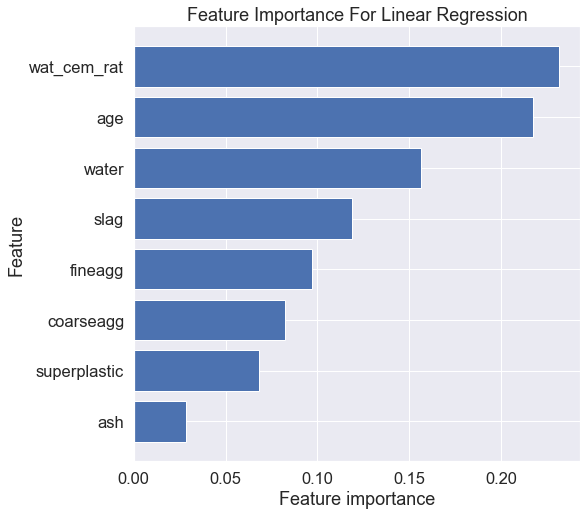

In [40]:
# Feature importances for linear regression
# The feature importances here are obtained by dividing the absolute value of each coefficient 
# by the sum of the absolute values of all coefficients. This provides the relative importance 
# of each feature.
ind = 0
reg_feat_imp = np.squeeze(np.abs(regs_fit_orig[ind].best_estimator_.steps[1][1].coef_) /\
                          np.sum(np.abs(regs_fit_orig[ind].best_estimator_.steps[1][1].coef_)))
feat_imp_df = pd.DataFrame(reg_feat_imp, columns = ['Feat_Imp'], index = X_train.columns)
feat_imp_df.sort_values(by = 'Feat_Imp', inplace = True)
plt.figure(figsize = (8, 8))
plt.barh(feat_imp_df.index, feat_imp_df['Feat_Imp'] , align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature Importance For Linear Regression")
plt.show()

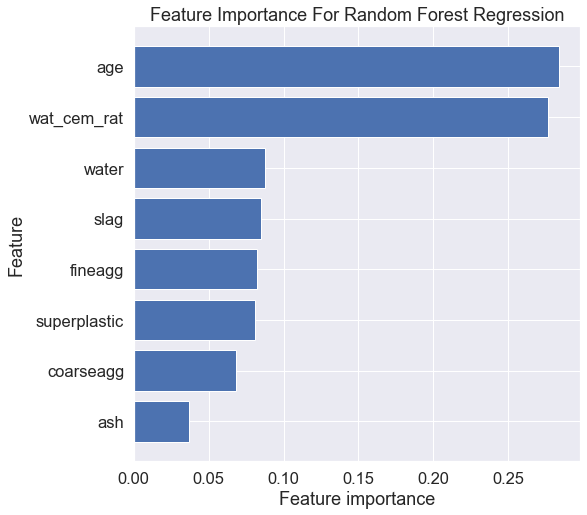

In [41]:
# Feature importances for Random Forest regression
ind = 5
reg_feat_imp = regs_fit_orig[ind].best_estimator_.steps[1][1].feature_importances_
feat_imp_df = pd.DataFrame(reg_feat_imp, columns = ['Feat_Imp'], index = X_train.columns)
feat_imp_df.sort_values(by = 'Feat_Imp', inplace = True)
plt.figure(figsize = (8, 8))
plt.barh(feat_imp_df.index, feat_imp_df['Feat_Imp'] , align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature Importance For Random Forest Regression")
plt.show()

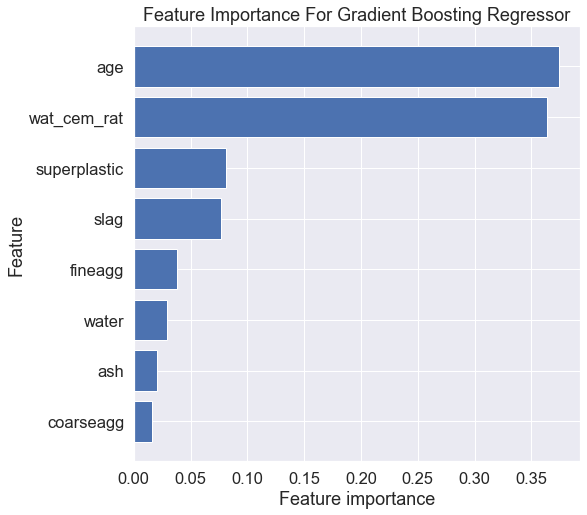

In [42]:
# Feature importances for Gradient Boosting regressor
ind = 6
reg_feat_imp = regs_fit_orig[ind].best_estimator_.steps[1][1].feature_importances_
feat_imp_df = pd.DataFrame(reg_feat_imp, columns = ['Feat_Imp'], index = X_train.columns)
feat_imp_df.sort_values(by = 'Feat_Imp', inplace = True)
plt.figure(figsize = (8, 8))
plt.barh(feat_imp_df.index, feat_imp_df['Feat_Imp'] , align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.title("Feature Importance For Gradient Boosting Regressor")
plt.show()

* <b>The features importances based on the linear regression fit, random forest regressor fit, gradient boosting regressor fit wih the original dataset are shown in the plots above.</b>
* <b>'age' and 'wat_cem_rat' are consistently identified as the most important features by all three regressors. Other important features are 'water' and 'slag'.</b>
* <b>'blast furnace ash' has very low feature importance.</b>